# 1. Initial EDA of the 2023 cancer waiting times



In [2]:
#download the relevant datasets
!wget 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2024/01/Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx'

--2025-08-08 14:22:18--  https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2024/01/Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx
Resolving www.england.nhs.uk (www.england.nhs.uk)... 3.167.56.13, 3.167.56.42, 3.167.56.52, ...
Connecting to www.england.nhs.uk (www.england.nhs.uk)|3.167.56.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691643 (1.6M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx.2’

Cancer-Waiting-Time 100%[===================>]   1.61M  --.-KB/s    in 0.02s   

2025-08-08 14:22:18 (80.0 MB/s) - ‘Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx.2’ saved [1691643/1691643]



In [3]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [4]:
#creating variables for datasets
dataset_2023 = pd.read_excel('Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx')

In [5]:
#display the datasets
display(dataset_2023)

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
0,2023-04-01,2023-24,APR,2WW,GEC,NaN,Suspected other cancer,11.0,9.0,2.0
1,2023-04-01,2023-24,APR,2WW,NQT,NaN,Suspected skin cancer,138.0,124.0,14.0
2,2023-04-01,2023-24,APR,2WW,NV1,NaN,Suspected lower gastrointestinal cancer,113.0,86.0,27.0
3,2023-04-01,2023-24,APR,2WW,NV1,NaN,Suspected upper gastrointestinal cancer,72.0,66.0,6.0
4,2023-04-01,2023-24,APR,2WW,NVM,NaN,Suspected skin cancer,109.0,106.0,3.0
...,...,...,...,...,...,...,...,...,...,...
47661,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected sarcoma,40.0,23.0,17.0
47662,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected skin cancer,1331.0,712.0,619.0
47663,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected testicular cancer,14.0,13.0,1.0
47664,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected upper gastrointestinal cancer,289.0,195.0,94.0


In [7]:
#Getting concise summary of dataframe
dataset_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47666 entries, 0 to 47665
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   PERIOD                       47666 non-null  datetime64[ns]
 1   YEAR                         47666 non-null  object        
 2   MONTH                        47666 non-null  object        
 3   STANDARD                     47666 non-null  object        
 4   ORG CODE                     47666 non-null  object        
 5   CARE SETTING/REFERRAL ROUTE  37249 non-null  object        
 6   CANCER TYPE                  47666 non-null  object        
 7   TOTAL TREATED                47666 non-null  float64       
 8   WITHIN STANDARD              47666 non-null  float64       
 9   BREACHES                     47666 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 3.6+ MB


In [8]:
#Getting number of rows and columns, column names and index information.
print("Rows and Columns: ",dataset_2023.shape)
print("Column names: ", dataset_2023.columns)
print("Index: ", dataset_2023.index)

Rows and Columns:  (47666, 10)
Column names:  Index(['PERIOD', 'YEAR', 'MONTH', 'STANDARD', 'ORG CODE',
       'CARE SETTING/REFERRAL ROUTE', 'CANCER TYPE', 'TOTAL TREATED',
       'WITHIN STANDARD', 'BREACHES'],
      dtype='object')
Index:  RangeIndex(start=0, stop=47666, step=1)


In [9]:
# Listing all the unique values of the "standard" column

unique_categories = dataset_2023['STANDARD'].unique()
print(unique_categories)

['2WW' '2WW Breast' '31 Days' '31 Days Sub (Drugs)' '31 Days Sub (Radio)'
 '31 Days Sub (Surgery)' '62 Days' '62 Days (Upgrade)'
 '62 Days (Screening)' '28 Days FDS' '28 Days FDS (By Route)']


In [10]:
# Listing all the unique values of the the other columns

period = dataset_2023['PERIOD'].unique()
year = dataset_2023['YEAR'].unique()
month = dataset_2023['MONTH'].unique()
org_code = dataset_2023['ORG CODE'].unique()
care_setting = dataset_2023['CARE SETTING/REFERRAL ROUTE'].unique()
cancer_type = dataset_2023['CANCER TYPE'].unique()
total_treated = dataset_2023['TOTAL TREATED'].unique()
within_standard = dataset_2023['WITHIN STANDARD'].unique()
breaches = dataset_2023['BREACHES'].unique()
print(unique_categories)
print(year)
print(month)
print(org_code)
print(care_setting)
print(cancer_type)
print(total_treated)
print(within_standard)
print(breaches)

['2WW' '2WW Breast' '31 Days' '31 Days Sub (Drugs)' '31 Days Sub (Radio)'
 '31 Days Sub (Surgery)' '62 Days' '62 Days (Upgrade)'
 '62 Days (Screening)' '28 Days FDS' '28 Days FDS (By Route)']
['2023-24']
['APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP']
['GEC' 'NQT' 'NV1' 'NVM' 'NYG' 'NYT' 'R0A' 'R0B' 'R0D' 'R1F' 'R1H' 'R1K'
 'RA2' 'RA7' 'RA9' 'RAE' 'RAJ' 'RAL' 'RAN' 'RAP' 'RAS' 'RAX' 'RBD' 'RBK'
 'RBL' 'RBN' 'RBQ' 'RBS' 'RBT' 'RBV' 'RC9' 'RCB' 'RCD' 'RCF' 'RCU' 'RCX'
 'RD1' 'RD8' 'RDE' 'RDU' 'REF' 'REM' 'REN' 'REP' 'RET' 'RF4' 'RFF' 'RFR'
 'RFS' 'RGN' 'RGP' 'RGR' 'RGT' 'RH5' 'RH8' 'RHM' 'RHQ' 'RHU' 'RHW' 'RJ1'
 'RJ2' 'RJ6' 'RJ7' 'RJC' 'RJE' 'RJL' 'RJN' 'RJR' 'RJZ' 'RK5' 'RK9' 'RKB'
 'RKE' 'RL1' 'RL4' 'RLQ' 'RLT' 'RM1' 'RM3' 'RMC' 'RMP' 'RN3' 'RN5' 'RN7'
 'RNA' 'RNN' 'RNQ' 'RNS' 'RNZ' 'RP5' 'RP6' 'RPA' 'RPC' 'RPY' 'RQ3' 'RQM'
 'RQW' 'RQX' 'RR7' 'RR8' 'RRF' 'RRJ' 'RRK' 'RRU' 'RRV' 'RTD' 'RTE' 'RTF'
 'RTG' 'RTH' 'RTK' 'RTP' 'RTR' 'RTX' 'RVJ' 'RVR' 'RVV' 'RVW' 'RVY' 'RWA'
 'RWD' 'RWE' 'RWF' 'RWG' 'RW

In [11]:
#descriptive stastics for numerical columns
print(dataset_2023.describe())      # Generate descriptive statistics of numerical columns (count, mean, std, min, max, quartiles)
print(dataset_2023.describe(include='all')) # Include all columns (numerical and categorical)
print(dataset_2023.describe(include=['object'])) # Include only categorical columns

                              PERIOD  TOTAL TREATED  WITHIN STANDARD  \
count                          47666   47666.000000     47666.000000   
mean   2023-06-16 14:07:14.724961024     111.841701        83.596222   
min              2023-04-01 00:00:00       0.500000         0.000000   
25%              2023-05-01 00:00:00       7.000000         5.000000   
50%              2023-07-01 00:00:00      22.000000        17.000000   
75%              2023-08-01 00:00:00      94.500000        69.000000   
max              2023-09-01 00:00:00    5978.000000      4098.000000   
std                              NaN     308.349883       224.882067   

           BREACHES  
count  47666.000000  
mean      28.245479  
min        0.000000  
25%        0.000000  
50%        3.000000  
75%       14.000000  
max     2630.000000  
std       99.307686  
                               PERIOD     YEAR  MONTH                STANDARD  \
count                           47666    47666  47666                   

In [12]:
#investigating Null values

print("Missing values per column: ", dataset_2023.isnull().sum())  # Count missing values per column
print("total missing values in dataset: ", dataset_2023.isnull().sum().sum()) # Total missing values in the DataFrame
print("Alias for isnull(): ", dataset_2023.isna().sum())    # Alias for isnull()

Missing values per column:  PERIOD                             0
YEAR                               0
MONTH                              0
STANDARD                           0
ORG CODE                           0
CARE SETTING/REFERRAL ROUTE    10417
CANCER TYPE                        0
TOTAL TREATED                      0
WITHIN STANDARD                    0
BREACHES                           0
dtype: int64
total missing values in dataset:  10417
Alias for isnull():  PERIOD                             0
YEAR                               0
MONTH                              0
STANDARD                           0
ORG CODE                           0
CARE SETTING/REFERRAL ROUTE    10417
CANCER TYPE                        0
TOTAL TREATED                      0
WITHIN STANDARD                    0
BREACHES                           0
dtype: int64


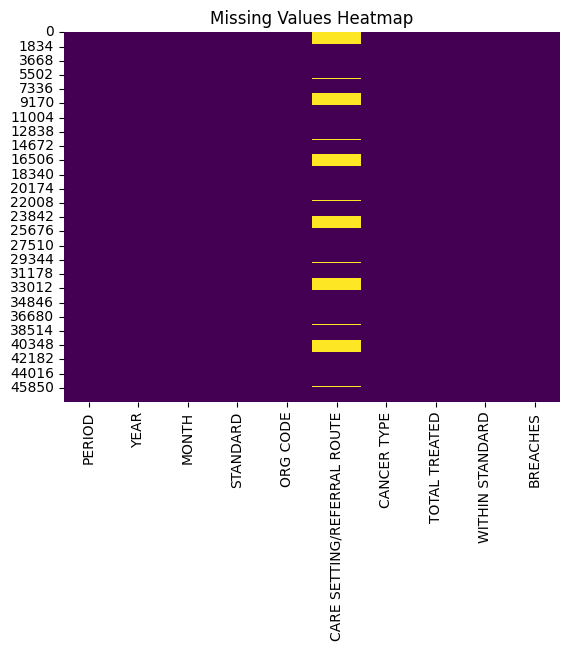

In [13]:
sns.heatmap(dataset_2023.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [14]:
# Filter the DataFrame to find rows with missing 'CARE SETTING/REFERRAL ROUTE' values
missing_care_setting_df = dataset_2023[dataset_2023['CARE SETTING/REFERRAL ROUTE'].isnull()]

# Get the unique values from the 'STANDARD' column in the filtered DataFrame
standards_with_missing_care_setting = missing_care_setting_df['STANDARD'].unique()

# Print the result
print("Unique values in 'STANDARD' column related to missing 'CARE SETTING/REFERRAL ROUTE':")
print(standards_with_missing_care_setting)

Unique values in 'STANDARD' column related to missing 'CARE SETTING/REFERRAL ROUTE':
['2WW' '2WW Breast' '28 Days FDS']


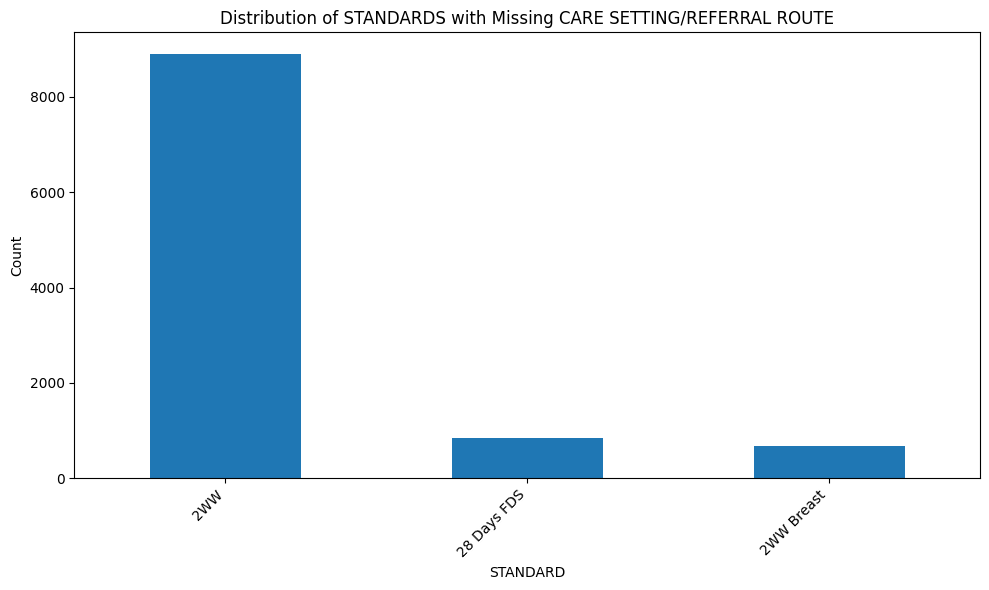

In [15]:
# Count the occurrences of each unique standard in the filtered DataFrame
standard_counts = missing_care_setting_df['STANDARD'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
standard_counts.plot(kind='bar')
plt.title('Distribution of STANDARDS with Missing CARE SETTING/REFERRAL ROUTE')
plt.xlabel('STANDARD')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Define the list of standards to remove
standards_to_remove = ['2WW', '28 Days FDS', '2WW Breast']

# Filter the DataFrame to remove rows where 'STANDARD' is in the list
df_filtered = dataset_2023[~dataset_2023['STANDARD'].isin(standards_to_remove)]

# Display the filtered DataFrame
display(df_filtered.head())

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
1548,2023-04-01,2023-24,APR,31 Days,NQT,Non-admitted,ALL CANCERS,5.0,4.0,1.0
1549,2023-04-01,2023-24,APR,31 Days,NVM,Admitted,ALL CANCERS,8.0,8.0,0.0
1550,2023-04-01,2023-24,APR,31 Days,NVM,Non-admitted,ALL CANCERS,4.0,4.0,0.0
1551,2023-04-01,2023-24,APR,31 Days,NYG,Admitted,ALL CANCERS,42.0,42.0,0.0
1552,2023-04-01,2023-24,APR,31 Days,NYT,Non-admitted,ALL CANCERS,15.0,15.0,0.0


In [17]:
# Get the counts of all unique values in the 'STANDARD' column of the filtered DataFrame
standard_counts_filtered = df_filtered['STANDARD'].value_counts()

# Print the result
print("Counts of unique values in 'STANDARD' column after filtering:")
print(standard_counts_filtered)

Counts of unique values in 'STANDARD' column after filtering:
STANDARD
28 Days FDS (By Route)    11328
31 Days                   10014
62 Days                    9949
62 Days (Upgrade)          1580
31 Days Sub (Drugs)        1321
62 Days (Screening)        1240
31 Days Sub (Surgery)      1177
31 Days Sub (Radio)         640
Name: count, dtype: int64


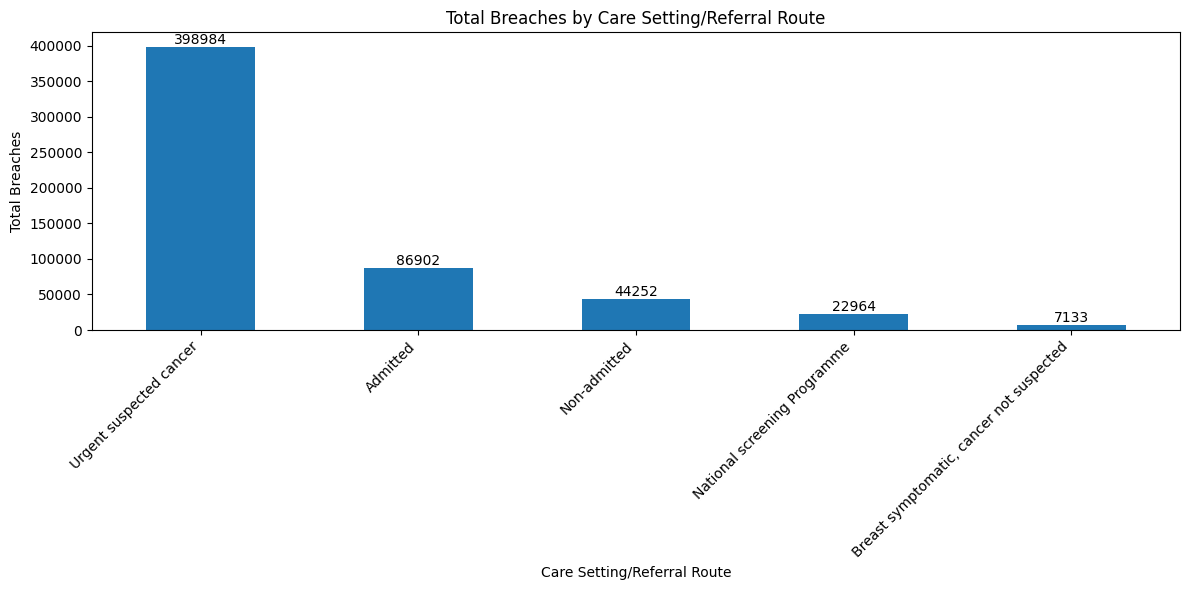

In [18]:
# Group by 'CARE SETTING/REFERRAL ROUTE' and sum the 'BREACHES'
breaches_by_care_setting = df_filtered.groupby('CARE SETTING/REFERRAL ROUTE')['BREACHES'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = breaches_by_care_setting.plot(kind='bar')
plt.title('Total Breaches by Care Setting/Referral Route')
plt.xlabel('Care Setting/Referral Route')
plt.ylabel('Total Breaches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the exact number above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

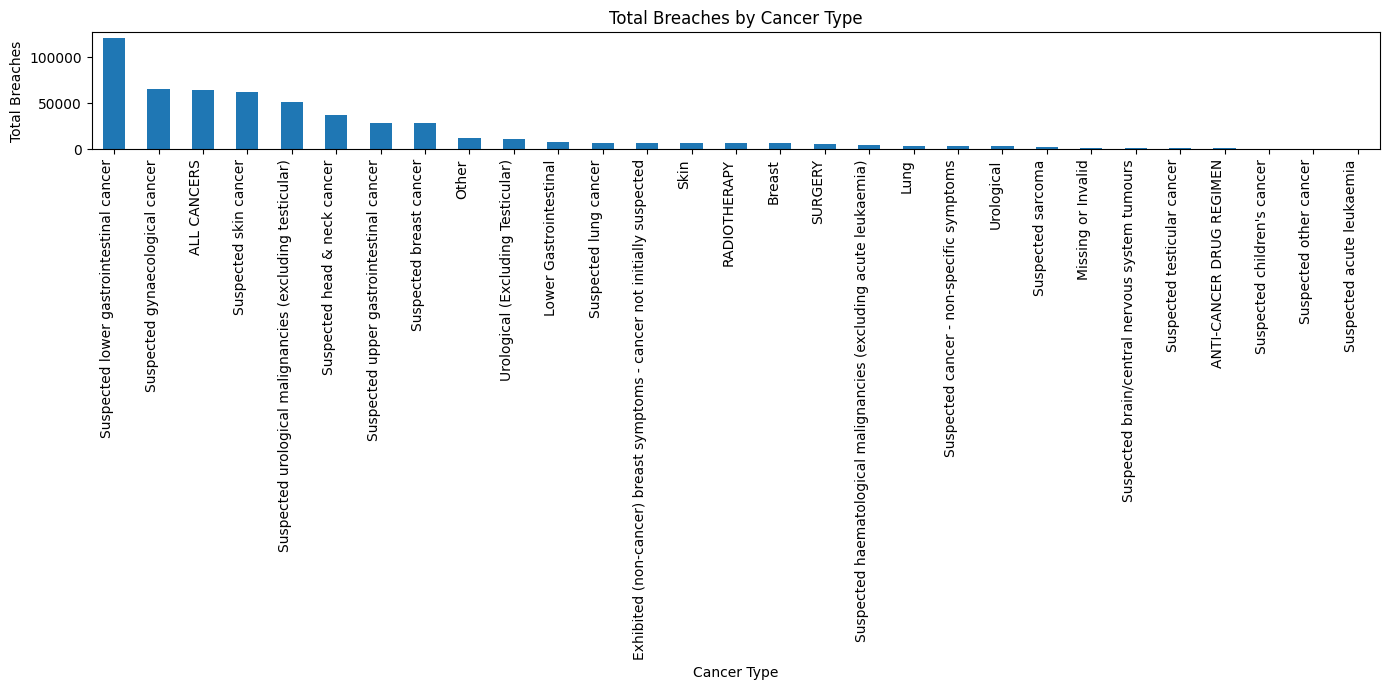

In [19]:
# Group by 'CANCER TYPE' and sum the 'BREACHES'
breaches_by_cancer_type = df_filtered.groupby('CANCER TYPE')['BREACHES'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
breaches_by_cancer_type.plot(kind='bar')
plt.title('Total Breaches by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Total Breaches')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

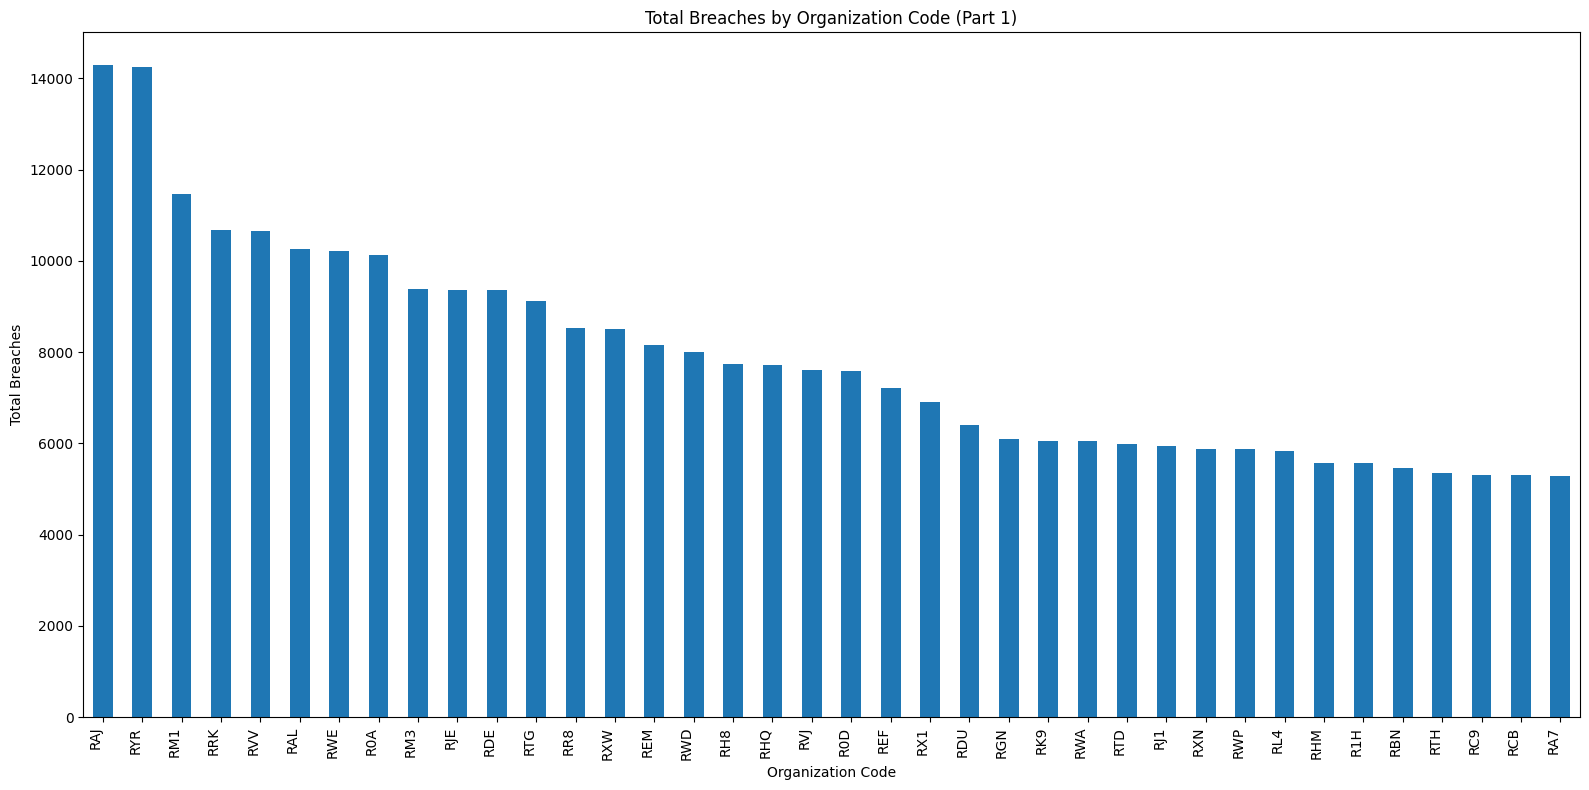

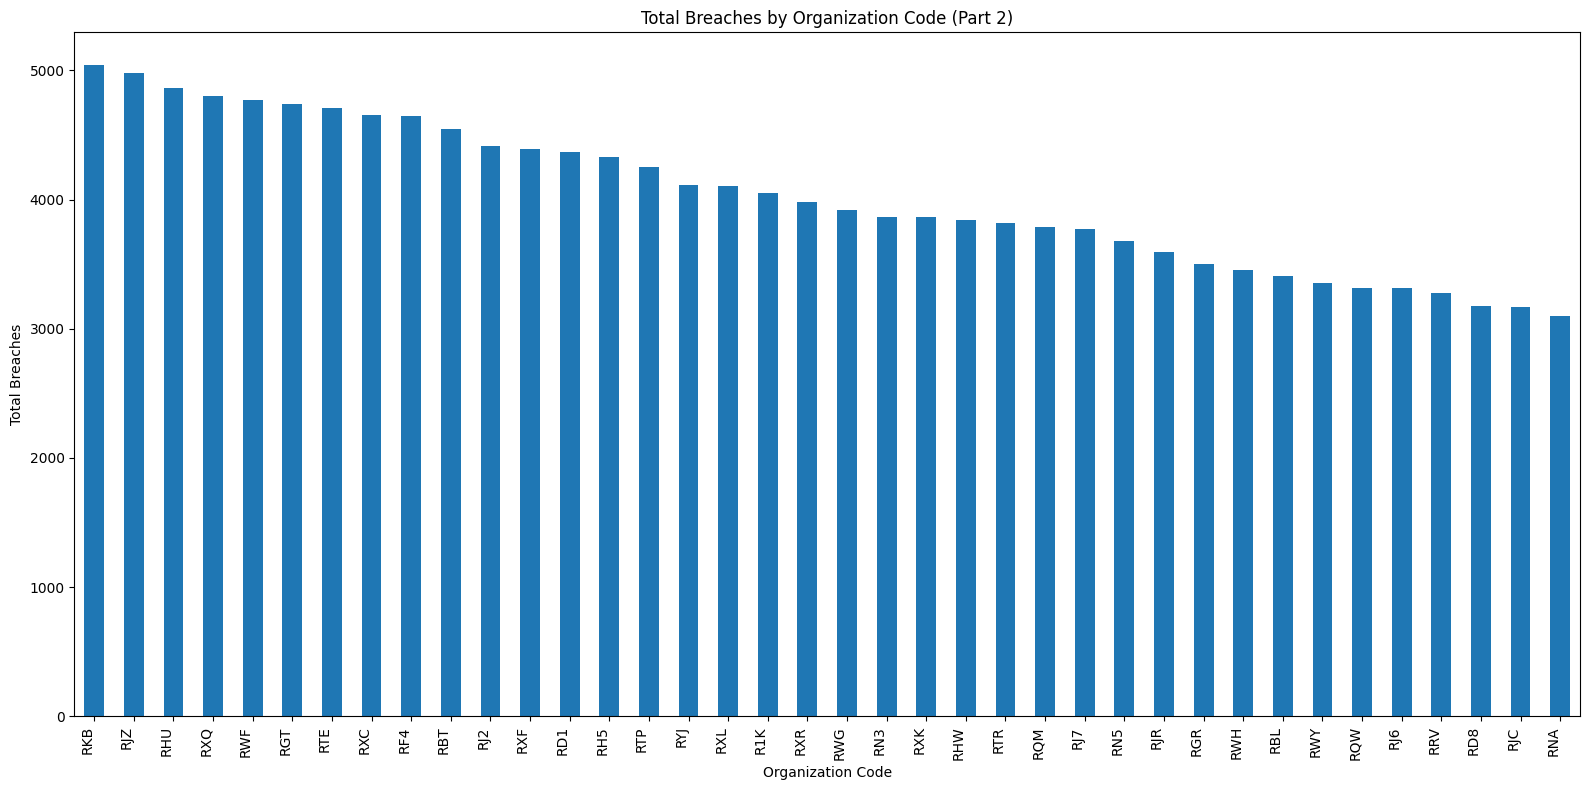

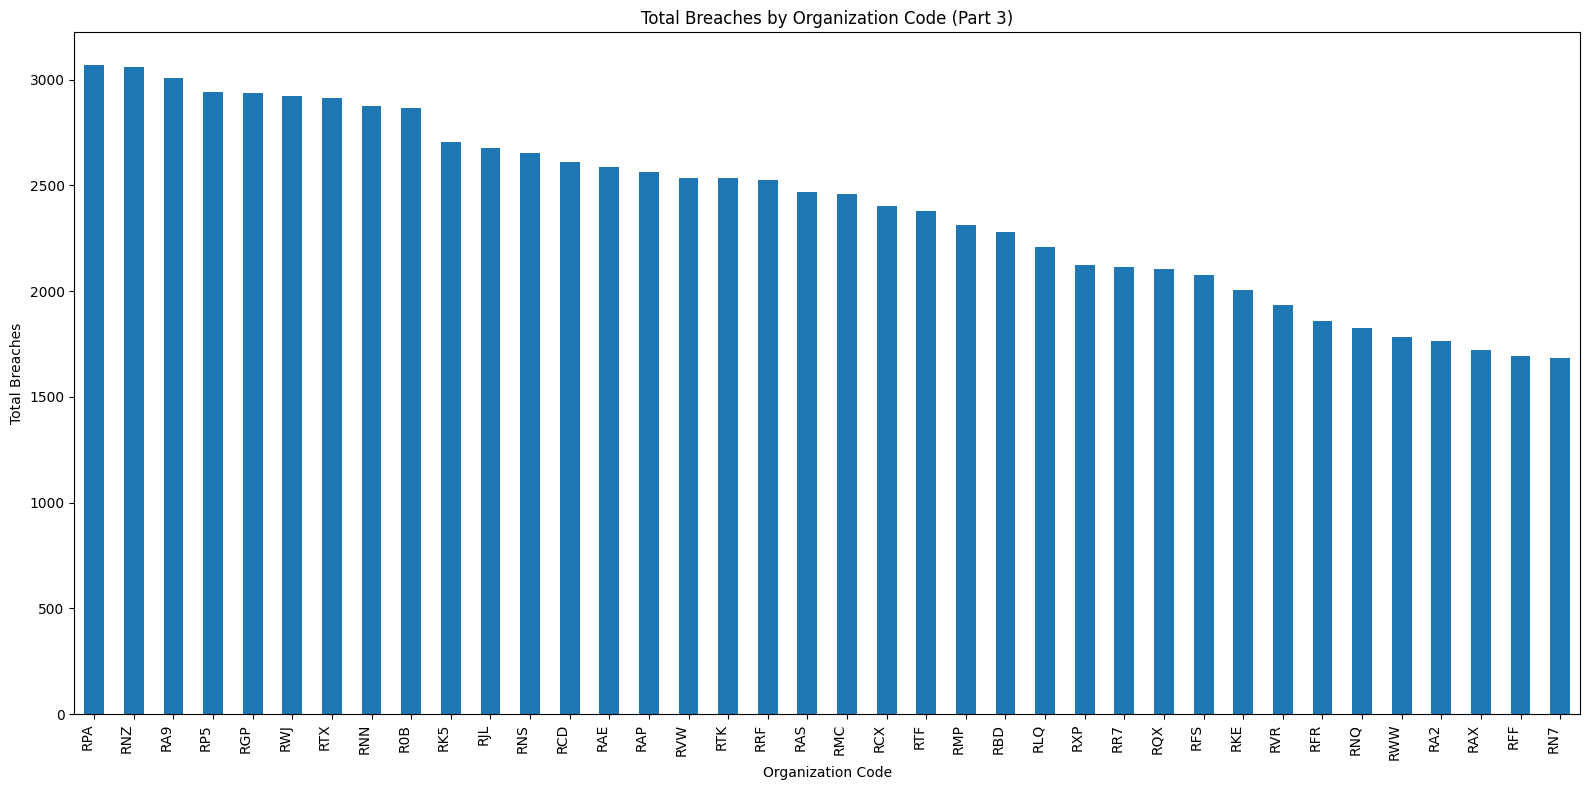

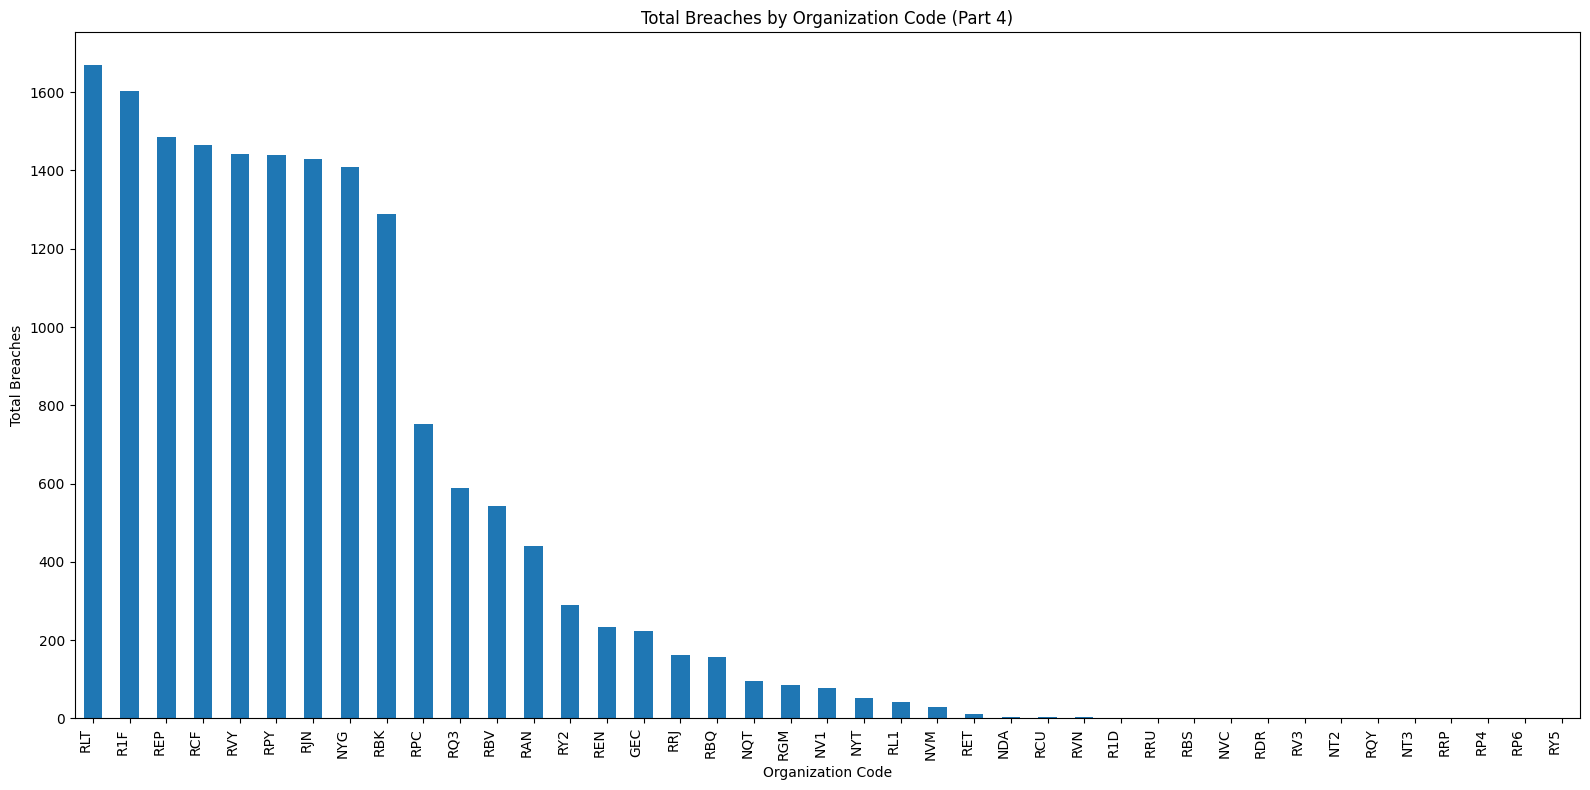

In [20]:
# Group by 'ORG CODE' and sum the 'BREACHES' and sort by breaches
breaches_by_org_code = df_filtered.groupby('ORG CODE')['BREACHES'].sum().sort_values(ascending=False)

# Calculate the size of each chunk for 4 graphs
chunk_size = len(breaches_by_org_code) // 4

# Create 4 separate plots
for i in range(4):
    start_index = i * chunk_size
    end_index = start_index + chunk_size if i < 3 else len(breaches_by_org_code)
    current_chunk = breaches_by_org_code.iloc[start_index:end_index]

    plt.figure(figsize=(16, 8))
    current_chunk.plot(kind='bar')
    plt.title(f'Total Breaches by Organization Code (Part {i+1})')
    plt.xlabel('Organization Code')
    plt.ylabel('Total Breaches')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [21]:
# Count the occurrences of each unique value in the 'ORG CODE' column of the filtered DataFrame
org_code_counts = df_filtered['ORG CODE'].value_counts()

# Convert the counts Series to a DataFrame for saving to Excel
org_code_counts_df = org_code_counts.reset_index()
org_code_counts_df.columns = ['ORG CODE', 'Count']

# Save the counts DataFrame to an Excel file
org_code_counts_df.to_excel('org_code_counts.xlsx', index=False)

print("Counts of unique values in 'ORG CODE' column saved to 'org_code_counts.xlsx'")

Counts of unique values in 'ORG CODE' column saved to 'org_code_counts.xlsx'


In [22]:
# Upload the 'org_code_trust.xlsx'


org_code_trust_df = pd.read_excel('org_code_trust_2.xlsx')
display(org_code_trust_df.head())

,ORG CODE,TRUST
0,01H,NHS Cumbria CCG (Clinical Commissioning Group)
1,01K,NHS Lancashire North CCG
2,5ER,NHS South Cumbria CCG (Clinical Commissioning ...
3,5J2,Warrington PCT (Primary Care Trust)
4,5J5,Halton PCT (Primary Care Trust)


In [23]:
# Merge the two DataFrames on the 'ORG CODE' column
df_merged = pd.merge(df_filtered, org_code_trust_df, on='ORG CODE', how='left')

# Display the merged DataFrame
display(df_merged)

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST
0,2023-04-01,2023-24,APR,31 Days,NQT,Non-admitted,ALL CANCERS,5.0,4.0,1.0,NHS North Tyneside CCG
1,2023-04-01,2023-24,APR,31 Days,NVM,Admitted,ALL CANCERS,8.0,8.0,0.0,NHS Wiltshire CCG
2,2023-04-01,2023-24,APR,31 Days,NVM,Non-admitted,ALL CANCERS,4.0,4.0,0.0,NHS Wiltshire CCG
3,2023-04-01,2023-24,APR,31 Days,NYG,Admitted,ALL CANCERS,42.0,42.0,0.0,NHS Wyre Forest CCG
4,2023-04-01,2023-24,APR,31 Days,NYT,Non-admitted,ALL CANCERS,15.0,15.0,0.0,NHS West Suffolk CCG
...,...,...,...,...,...,...,...,...,...,...,...
37244,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected sarcoma,40.0,23.0,17.0,Southern Health NHS Foundation Trust
37245,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected skin cancer,1331.0,712.0,619.0,Southern Health NHS Foundation Trust
37246,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected testicular cancer,14.0,13.0,1.0,Southern Health NHS Foundation Trust
37247,2023-09-01,2023-24,SEP,28 Days FDS (By Route),RYR,Urgent suspected cancer,Suspected upper gastrointestinal cancer,289.0,195.0,94.0,Southern Health NHS Foundation Trust


In [24]:
# Rename the 'Trust' column to 'Provider'
df_merged = df_merged.rename(columns={'Trust': 'PROVIDER'})

# Display the updated DataFrame
display(df_merged.head())

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST
0,2023-04-01,2023-24,APR,31 Days,NQT,Non-admitted,ALL CANCERS,5.0,4.0,1.0,NHS North Tyneside CCG
1,2023-04-01,2023-24,APR,31 Days,NVM,Admitted,ALL CANCERS,8.0,8.0,0.0,NHS Wiltshire CCG
2,2023-04-01,2023-24,APR,31 Days,NVM,Non-admitted,ALL CANCERS,4.0,4.0,0.0,NHS Wiltshire CCG
3,2023-04-01,2023-24,APR,31 Days,NYG,Admitted,ALL CANCERS,42.0,42.0,0.0,NHS Wyre Forest CCG
4,2023-04-01,2023-24,APR,31 Days,NYT,Non-admitted,ALL CANCERS,15.0,15.0,0.0,NHS West Suffolk CCG


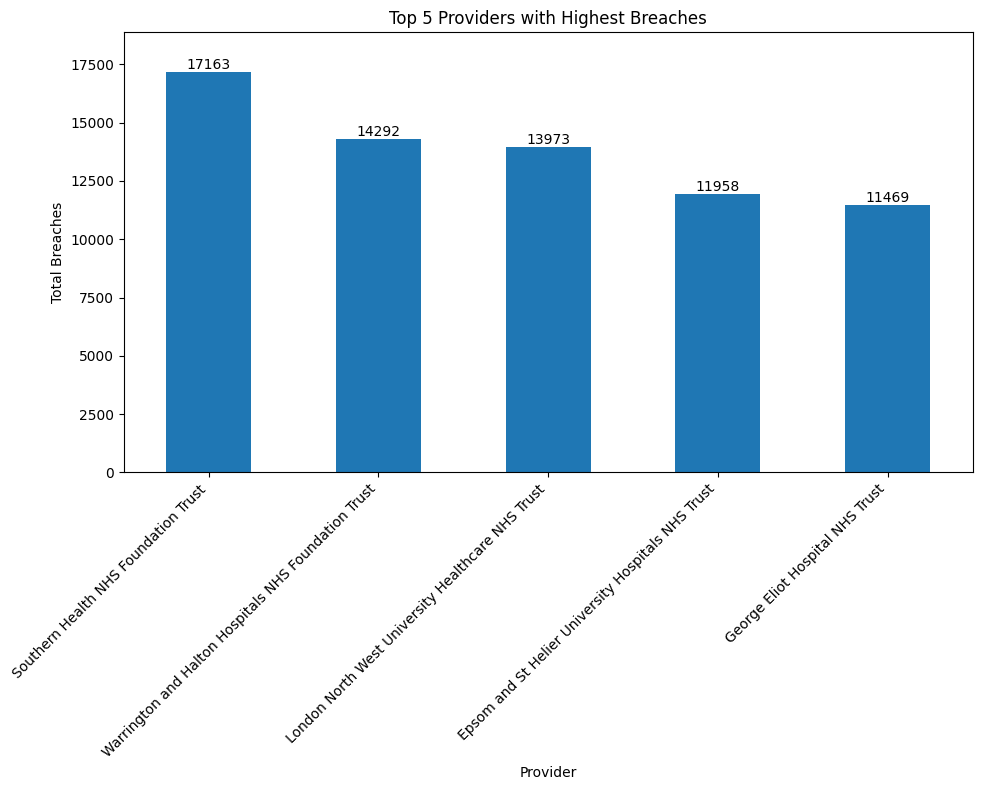

In [25]:
# Group by 'TRUST' and sum the 'BREACHES', then get the top 5
top_5_providers_breaches = df_merged.groupby('TRUST')['BREACHES'].sum().sort_values(ascending=False).head(5)

# Create a bar plot of the top 5 providers with the highest breaches
plt.figure(figsize=(10, 8)) # Increased the height from 6 to 8
ax = top_5_providers_breaches.plot(kind='bar')
plt.title('Top 5 Providers with Highest Breaches')
plt.xlabel('Provider')
plt.ylabel('Total Breaches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the exact number above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Add some padding to the top of the y-axis
max_breaches = top_5_providers_breaches.max()
plt.ylim(0, max_breaches * 1.1) # Increase the upper y-limit by 10%

plt.show()

In [ ]:
# Group by 'PROVIDER' and sum the 'BREACHES', then get the bottom 5 (lowest breaches)
bottom_5_providers_breaches = df_merged.groupby('TRUST')['BREACHES'].sum().sort_values(ascending=True).head(5)

# Convert the Series to a DataFrame for table format
bottom_5_providers_breaches_df = bottom_5_providers_breaches.reset_index()
bottom_5_providers_breaches_df.columns = ['TRUST', 'Total Breaches']

# Display the result in a table format
display(bottom_5_providers_breaches_df)

# 2. NHS cancer waiting times Dataset merging.

In [26]:
#Downloading datasets
!wget 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2024/01/Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx'
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2023/07/Cancer-Waiting-Times-Apr-2022-Mar-2023-Data-Extract-Provider.xlsx
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/10/Cancer-Waiting-Times-Apr-Mar-2022-Data-Extract-Provider.xlsx
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2021/07/Cancer-Waiting-Times-2020-21-Data-Extract-Provider-Final.xlsx
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/07/Cancer-Waiting-Times-2019-20-Data-Extract-Provider-Final.xlsx
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/07/Cancer-Waiting-Times-Apr2018-Mar-2019-Data-Extract-Provider-Final.xlsx
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2018/05/Cancer-Waiting-Times-Apr-Mar-2018-Data-Extract-Provider.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2016-17-Data-Extract-Provider-XLSXB-2.0MB.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-Apr-Mar-2016-Data-Extract-Provider.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2014-15-Data-Extract-Provider-XLSB-2.1MB-1.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2013-14-Data-Extract-Provider-XLSB-2.0MB.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2012-13-Data-Extract-Provider-XLSB-1.8MB.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2011-12-Data-Extract-Provider-XLSB-1.8MB.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-2010-11-Data-Extract-Provider-XLSB-1.7MB.xlsb
!wget https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/02/Cancer-Waiting-Times-Oct-2009-Mar-2010-Data-Extract-Provider-XLSB-776KB.xlsb

--2025-08-08 14:23:36--  https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2024/01/Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx
Resolving www.england.nhs.uk (www.england.nhs.uk)... 108.139.29.42, 108.139.29.32, 108.139.29.46, ...
Connecting to www.england.nhs.uk (www.england.nhs.uk)|108.139.29.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691643 (1.6M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx.3’

Cancer-Waiting-Time 100%[===================>]   1.61M  --.-KB/s    in 0.06s   

2025-08-08 14:23:36 (27.9 MB/s) - ‘Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx.3’ saved [1691643/1691643]

--2025-08-08 14:23:36--  https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2023/07/Cancer-Waiting-Times-Apr-2022-Mar-2023-Data-Extract-Provider.xlsx
Resolving www.england.nhs.uk (www.england.nhs.uk)... 

In [27]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#installing relevent libraries
!pip install pyxlsb

In [28]:
#creating variables for datasets
df_2023 = pd.read_excel('Cancer-Waiting-Times-Apr-2023-Sep-2023-Data-Extract-Provider.xlsx')
df_2022 = pd.read_excel('Cancer-Waiting-Times-Apr-2022-Mar-2023-Data-Extract-Provider.xlsx')
df_2021 = pd.read_excel('Cancer-Waiting-Times-2020-21-Data-Extract-Provider-Final.xlsx')
df_2020 = pd.read_excel('Cancer-Waiting-Times-2019-20-Data-Extract-Provider-Final.xlsx')
df_2019 = pd.read_excel('Cancer-Waiting-Times-Apr2018-Mar-2019-Data-Extract-Provider-Final.xlsx')
df_2018 = pd.read_excel('Cancer-Waiting-Times-Apr-Mar-2018-Data-Extract-Provider.xlsb')
df_2017 = pd.read_excel('Cancer-Waiting-Times-2016-17-Data-Extract-Provider-XLSXB-2.0MB.xlsb')
df_2016 = pd.read_excel('Cancer-Waiting-Times-Apr-Mar-2016-Data-Extract-Provider.xlsb')
df_2015 = pd.read_excel('Cancer-Waiting-Times-2014-15-Data-Extract-Provider-XLSB-2.1MB-1.xlsb')
df_2014 = pd.read_excel('Cancer-Waiting-Times-2014-15-Data-Extract-Provider-XLSB-2.1MB-1.xlsb')
df_2013 = pd.read_excel('Cancer-Waiting-Times-2013-14-Data-Extract-Provider-XLSB-2.0MB.xlsb')
df_2012 = pd.read_excel('Cancer-Waiting-Times-2012-13-Data-Extract-Provider-XLSB-1.8MB.xlsb')
df_2011 = pd.read_excel('Cancer-Waiting-Times-2011-12-Data-Extract-Provider-XLSB-1.8MB.xlsb')
df_2010 = pd.read_excel('Cancer-Waiting-Times-2010-11-Data-Extract-Provider-XLSB-1.7MB.xlsb')
df_2009 = pd.read_excel('Cancer-Waiting-Times-Oct-2009-Mar-2010-Data-Extract-Provider-XLSB-776KB.xlsb')


In [29]:
# Define a dictionary containing all the individual dataframes
dataframes = {
    'df_2009': df_2009, 'df_2010': df_2010, 'df_2011': df_2011, 'df_2012': df_2012,
    'df_2013': df_2013, 'df_2014': df_2014, 'df_2015': df_2015, 'df_2016': df_2016,
    'df_2017': df_2017, 'df_2018': df_2018, 'df_2019': df_2019, 'df_2020': df_2020,
    'df_2021': df_2021, 'df_2022': df_2022, 'df_2023': df_2023
}

In [30]:
# Standardize column names and select relevant columns before concatenating
dataframes_to_concat = []

for name, df in dataframes.items():
    # Standardize 'CANCER TYPE' column name
    if 'CANCER TYPE/TREATMENT' in df.columns:
        df = df.rename(columns={'CANCER TYPE/TREATMENT': 'CANCER TYPE'})

    # Standardize 'CARE SETTING' column name
    if 'CARE SETTING' in df.columns and 'CARE SETTING/REFERRAL ROUTE' not in df.columns:
        df = df.rename(columns={'CARE SETTING': 'CARE SETTING/REFERRAL ROUTE'})

    # Select a consistent set of columns
    # Dropping 'AREA TEAM' and 'DCO' as they are not in all dataframes or have limited data
    columns_to_keep = ['PERIOD', 'YEAR', 'MONTH', 'STANDARD', 'ORG CODE',
                       'CARE SETTING/REFERRAL ROUTE', 'CANCER TYPE',
                       'TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES']

    # Check if all columns to keep exist in the current dataframe, and keep only existing ones
    current_columns_to_keep = [col for col in columns_to_keep if col in df.columns]
    df_standardized = df[current_columns_to_keep]


    dataframes_to_concat.append(df_standardized)

# Concatenate all dataframes into one
df_combined = pd.concat(dataframes_to_concat, ignore_index=True)

# Display the first few rows and info of the combined DataFrame
display(df_combined.head())
display(df_combined.info())

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
0,40087,2009-10,OCT,2WW,5ER,NaN,Suspected urological malignancies (excluding t...,5.0,4.0,1.0
1,40087,2009-10,OCT,2WW,5LG,NaN,Suspected acute leukaemia,1.0,1.0,0.0
2,40087,2009-10,OCT,2WW,5LG,NaN,Suspected breast cancer,13.0,12.0,1.0
3,40087,2009-10,OCT,2WW,5LG,NaN,Suspected haematological malignancies (excludi...,2.0,2.0,0.0
4,40087,2009-10,OCT,2WW,5LG,NaN,Suspected head & neck cancer,5.0,5.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941570 entries, 0 to 1941569
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   PERIOD                       object 
 1   YEAR                         object 
 2   MONTH                        object 
 3   STANDARD                     object 
 4   ORG CODE                     object 
 5   CARE SETTING/REFERRAL ROUTE  object 
 6   CANCER TYPE                  object 
 7   TOTAL TREATED                float64
 8   WITHIN STANDARD              float64
 9   BREACHES                     float64
dtypes: float64(3), object(7)
memory usage: 148.1+ MB


None

In [31]:
unique_standards = df_combined['STANDARD'].unique()
print(unique_standards)

['2WW' '2WW Breast' '31 Days' '31 Days Sub (Drugs)' '31 Days Sub (Radio)'
 '31 Days Sub (Surgery)' '62 Days' '62 Days (Consultant)'
 '62 Days (Screening)' '62 Days (Upgrade)' '28 Days FDS'
 '28 Days FDS (By Route)']


In [32]:
#Removing standard wait times not in line with research question
# Define the list of standards to remove
standards_to_remove = ['2WW', '28 Days FDS', '2WW Breast', '31 Days Sub (Drugs)', '31 Days Sub (Radio)',
'31 Days Sub (Surgery)', '28 Days FDS (By Route)', '31 Days']

# Filter the DataFrame to remove rows where 'STANDARD' is in the list
df_filtered = df_combined[~df_combined['STANDARD'].isin(standards_to_remove)]

# Display the filtered DataFrame
display(df_filtered.head())

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
42770,40087,2009-10,OCT,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5
42771,40087,2009-10,OCT,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5
42772,40087,2009-10,OCT,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5
42773,40087,2009-10,OCT,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0
42774,40087,2009-10,OCT,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0


In [33]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585271 entries, 42770 to 1939490
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIOD                       585271 non-null  object 
 1   YEAR                         585271 non-null  object 
 2   MONTH                        585271 non-null  object 
 3   STANDARD                     585271 non-null  object 
 4   ORG CODE                     585271 non-null  object 
 5   CARE SETTING/REFERRAL ROUTE  585271 non-null  object 
 6   CANCER TYPE                  585271 non-null  object 
 7   TOTAL TREATED                585271 non-null  float64
 8   WITHIN STANDARD              585271 non-null  float64
 9   BREACHES                     585271 non-null  float64
dtypes: float64(3), object(7)
memory usage: 49.1+ MB


In [34]:
unique_careset = df_filtered['CARE SETTING/REFERRAL ROUTE'].unique()
print(unique_careset)

['Admitted' 'Non-admitted']


In [35]:
# Investigating Null values in the combined DataFrame
print("Missing values per column:\n", df_filtered.isnull().sum())
print("\nTotal missing values in dataset:", df_filtered.isnull().sum().sum())

Missing values per column:
 PERIOD                         0
YEAR                           0
MONTH                          0
STANDARD                       0
ORG CODE                       0
CARE SETTING/REFERRAL ROUTE    0
CANCER TYPE                    0
TOTAL TREATED                  0
WITHIN STANDARD                0
BREACHES                       0
dtype: int64

Total missing values in dataset: 0


In [36]:
display(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 585271 entries, 42770 to 1939490
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIOD                       585271 non-null  object 
 1   YEAR                         585271 non-null  object 
 2   MONTH                        585271 non-null  object 
 3   STANDARD                     585271 non-null  object 
 4   ORG CODE                     585271 non-null  object 
 5   CARE SETTING/REFERRAL ROUTE  585271 non-null  object 
 6   CANCER TYPE                  585271 non-null  object 
 7   TOTAL TREATED                585271 non-null  float64
 8   WITHIN STANDARD              585271 non-null  float64
 9   BREACHES                     585271 non-null  float64
dtypes: float64(3), object(7)
memory usage: 49.1+ MB


None

In [37]:
# Sample DataFrame (assuming a mix of string dates and Excel serial numbers)
# Let's say 40087 is October 2009 in Excel serial number format


print("Original DataFrame:")
print(df_filtered)
print("\nOriginal Data Types:")
print(df_filtered.dtypes)


# Step 1: Attempt to convert the *entire* 'PERIOD' column to numeric.
# This will turn valid numbers into numbers, and non-numeric values into NaN.
df_filtered['PERIOD_numeric'] = pd.to_numeric(df_filtered['PERIOD'], errors='coerce')

# Step 2: Convert the numeric values (which are Excel serials) to datetime.
# Only apply this to the new 'PERIOD_numeric' column.
# NaN values will remain NaN (and then become NaT later).
df_filtered['PERIOD_excel_converted'] = pd.to_datetime(
    df_filtered['PERIOD_numeric'],
    unit='D',
    origin='1899-12-30',
    errors='coerce' # In case any numeric values are out of an interpretable range for dates
)

# Step 3: Convert the original 'PERIOD' column (which contains date strings) directly to datetime.
# This will handle the '2023-09-01 00:00:00' type strings.
# Numeric values (which were not converted to string first) will become NaT here.
df_filtered['PERIOD_string_converted'] = pd.to_datetime(
    df_filtered['PERIOD'],
    errors='coerce' # For unparseable strings like 'Invalid Date String'
)

# Step 4: Combine the two converted columns.
# We prioritize the Excel conversion if it resulted in a valid date,
# otherwise, we use the string conversion.
df_filtered['PERIOD'] = df_filtered['PERIOD_excel_converted'].fillna(
    df_filtered['PERIOD_string_converted']
)

# Drop the intermediate helper columns
df_filtered = df_filtered.drop(columns=['PERIOD_numeric', 'PERIOD_excel_converted', 'PERIOD_string_converted'])


# Display the info and head of the DataFrame to see the updated 'PERIOD' column
print("\nDataFrame after conversion:")
display(df_filtered.info())
display(df_filtered.head(10)) # Display more rows to see all examples

Original DataFrame:
                      PERIOD     YEAR MONTH             STANDARD ORG CODE  \
42770                  40087  2009-10   OCT              62 Days      5LG   
42771                  40087  2009-10   OCT              62 Days      5LG   
42772                  40087  2009-10   OCT              62 Days      5LG   
42773                  40087  2009-10   OCT              62 Days      5LG   
42774                  40087  2009-10   OCT              62 Days      5P5   
...                      ...      ...   ...                  ...      ...   
1939486  2023-09-01 00:00:00  2023-24   SEP  62 Days (Screening)      RXW   
1939487  2023-09-01 00:00:00  2023-24   SEP  62 Days (Screening)      RYJ   
1939488  2023-09-01 00:00:00  2023-24   SEP  62 Days (Screening)      RYJ   
1939489  2023-09-01 00:00:00  2023-24   SEP  62 Days (Screening)      RYR   
1939490  2023-09-01 00:00:00  2023-24   SEP  62 Days (Screening)      RYR   

        CARE SETTING/REFERRAL ROUTE  CANCER TYPE  TOTAL

/tmp/ipython-input-926012537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PERIOD_numeric'] = pd.to_numeric(df_filtered['PERIOD'], errors='coerce')
/tmp/ipython-input-926012537.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PERIOD_excel_converted'] = pd.to_datetime(
/tmp/ipython-input-926012537.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th


DataFrame after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 585271 entries, 42770 to 1939490
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PERIOD                       585271 non-null  datetime64[ns]
 1   YEAR                         585271 non-null  object        
 2   MONTH                        585271 non-null  object        
 3   STANDARD                     585271 non-null  object        
 4   ORG CODE                     585271 non-null  object        
 5   CARE SETTING/REFERRAL ROUTE  585271 non-null  object        
 6   CANCER TYPE                  585271 non-null  object        
 7   TOTAL TREATED                585271 non-null  float64       
 8   WITHIN STANDARD              585271 non-null  float64       
 9   BREACHES                     585271 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 49.1+

None

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
42770,2009-10-01,2009-10,OCT,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5
42771,2009-10-01,2009-10,OCT,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5
42772,2009-10-01,2009-10,OCT,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5
42773,2009-10-01,2009-10,OCT,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0
42774,2009-10-01,2009-10,OCT,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0
42775,2009-10-01,2009-10,OCT,62 Days,5QT,Admitted,ALL CANCERS,10.0,9.0,1.0
42776,2009-10-01,2009-10,OCT,62 Days,5QT,Non-admitted,ALL CANCERS,8.0,8.0,0.0
42777,2009-10-01,2009-10,OCT,62 Days,NTA,Admitted,ALL CANCERS,20.0,19.5,0.5
42778,2009-10-01,2009-10,OCT,62 Days,NTA,Non-admitted,ALL CANCERS,1.5,1.5,0.0
42779,2009-10-01,2009-10,OCT,62 Days,RA2,Non-admitted,ALL CANCERS,0.5,0.5,0.0


In [38]:
# Remove the 'YEAR' and 'MONTH' columns
df_filtered = df_filtered.drop(columns=['YEAR', 'MONTH'])

# Display the info of the updated DataFrame to confirm the columns are removed
display(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 585271 entries, 42770 to 1939490
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PERIOD                       585271 non-null  datetime64[ns]
 1   STANDARD                     585271 non-null  object        
 2   ORG CODE                     585271 non-null  object        
 3   CARE SETTING/REFERRAL ROUTE  585271 non-null  object        
 4   CANCER TYPE                  585271 non-null  object        
 5   TOTAL TREATED                585271 non-null  float64       
 6   WITHIN STANDARD              585271 non-null  float64       
 7   BREACHES                     585271 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 40.2+ MB


None

In [39]:
#Display the new df_filtered dataframe.
display(df_filtered.head())

,PERIOD,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
42770,2009-10-01,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5
42771,2009-10-01,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5
42772,2009-10-01,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5
42773,2009-10-01,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0
42774,2009-10-01,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0


In [40]:
#Assessing the ORG Code column
unique_orgcode = df_filtered['ORG CODE'].unique()
print(unique_orgcode)

['5LG' '5P5' '5QT' 'NTA' 'RA2' 'RA3' 'RA4' 'RA7' 'RA9' 'RAE' 'RAJ' 'RAL'
 'RAN' 'RAP' 'RAS' 'RAX' 'RBA' 'RBD' 'RBF' 'RBK' 'RBL' 'RBN' 'RBQ' 'RBT'
 'RBV' 'RBZ' 'RC1' 'RC3' 'RC9' 'RCB' 'RCC' 'RCD' 'RCF' 'RCX' 'RD1' 'RD3'
 'RD7' 'RD8' 'RDD' 'RDE' 'RDU' 'RDZ' 'RE9' 'REF' 'REM' 'REN' 'REP' 'RET'
 'RF4' 'RFF' 'RFR' 'RFS' 'RFW' 'RGC' 'RGM' 'RGN' 'RGP' 'RGQ' 'RGR' 'RGT'
 'RH8' 'RHM' 'RHQ' 'RHU' 'RHW' 'RJ1' 'RJ2' 'RJ6' 'RJ7' 'RJC' 'RJD' 'RJE'
 'RJF' 'RJL' 'RJN' 'RJR' 'RJZ' 'RK5' 'RK9' 'RKB' 'RKE' 'RL4' 'RLN' 'RLQ'
 'RLT' 'RLU' 'RM1' 'RM2' 'RM3' 'RM4' 'RMC' 'RMP' 'RN1' 'RN3' 'RN5' 'RN7'
 'RNA' 'RNH' 'RNJ' 'RNL' 'RNQ' 'RNS' 'RNZ' 'RP5' 'RPA' 'RPC' 'RPY' 'RQ3'
 'RQ6' 'RQ8' 'RQQ' 'RQW' 'RQX' 'RR1' 'RR2' 'RR7' 'RR8' 'RRF' 'RRJ' 'RRK'
 'RRV' 'RT3' 'RTD' 'RTE' 'RTF' 'RTG' 'RTH' 'RTK' 'RTP' 'RTR' 'RTX' 'RV8'
 'RVJ' 'RVL' 'RVR' 'RVV' 'RVW' 'RVY' 'RW3' 'RW6' 'RWA' 'RWD' 'RWE' 'RWF'
 'RWG' 'RWH' 'RWJ' 'RWP' 'RWW' 'RWY' 'RX1' 'RXC' 'RXF' 'RXH' 'RXK' 'RXL'
 'RXN' 'RXP' 'RXQ' 'RXR' 'RXW' 'RYJ' 'RYQ' 'RYR' '5

In [41]:
# Count the occurrences of each unique value in the 'ORG CODE' column of the filtered DataFrame
org_code_counts = df_filtered['ORG CODE'].value_counts()

# Convert the counts Series to a DataFrame for saving to Excel
org_code_counts_df = org_code_counts.reset_index()
org_code_counts_df.columns = ['ORG CODE', 'Count']

# Save the counts DataFrame to an Excel file
org_code_counts_df.to_excel('org_code_counts_3.xlsx', index=False)

print("Counts of unique values in 'ORG CODE' column saved to 'org_code_counts_3.xlsx'")

Counts of unique values in 'ORG CODE' column saved to 'org_code_counts_3.xlsx'


In [42]:
# Filter the DataFrame for rows with 'ORG CODE' equal to '01K'
org_code_01K_df = df_filtered[df_filtered['ORG CODE'] == '01K']

# Select the 'PERIOD' column from the filtered DataFrame
period_values_01K = org_code_01K_df['PERIOD']

# Display the period values
print("Period values for ORG CODE '01K':")
print(period_values_01K)

Period values for ORG CODE '01K':
868132    2015-01-01
869018    2015-03-01
1045357   2015-01-01
1046243   2015-03-01
Name: PERIOD, dtype: datetime64[ns]


In [43]:
# Upload the 'org_code_trust.xlsx'

org_code_trust_df = pd.read_excel('org_code_trust_2.xlsx')
display(org_code_trust_df.head())

# Merge the two DataFrames on the 'ORG CODE' column
df_merged = pd.merge(df_filtered, org_code_trust_df, on='ORG CODE', how='left')

# Display the merged DataFrame
display(df_merged)

,ORG CODE,TRUST
0,01H,NHS Cumbria CCG (Clinical Commissioning Group)
1,01K,NHS Lancashire North CCG
2,5ER,NHS South Cumbria CCG (Clinical Commissioning ...
3,5J2,Warrington PCT (Primary Care Trust)
4,5J5,Halton PCT (Primary Care Trust)


,PERIOD,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST
0,2009-10-01,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5,Wandsworth PCT (Primary Care Trust)
1,2009-10-01,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5,Wandsworth PCT (Primary Care Trust)
2,2009-10-01,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5,Wandsworth PCT (Primary Care Trust)
3,2009-10-01,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0,Wandsworth PCT (Primary Care Trust)
4,2009-10-01,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0,NHS South East Essex PCT (Primary Care Trust)
...,...,...,...,...,...,...,...,...,...
585266,2023-09-01,62 Days (Screening),RXW,Non-admitted,ALL CANCERS,1.0,1.0,0.0,London North West University Healthcare NHS Trust
585267,2023-09-01,62 Days (Screening),RYJ,Admitted,ALL CANCERS,21.5,10.5,11.0,North East London NHS Foundation Trust
585268,2023-09-01,62 Days (Screening),RYJ,Non-admitted,ALL CANCERS,1.5,0.0,1.5,North East London NHS Foundation Trust
585269,2023-09-01,62 Days (Screening),RYR,Admitted,ALL CANCERS,37.5,21.5,16.0,Southern Health NHS Foundation Trust


In [44]:
# Convert the 'Date' column to datetime if it's not already
df_merged['PERIOD'] = pd.to_datetime(df_merged['PERIOD'])

# Format the 'Date' column to show only month and year
df_merged['PERIOD'] = df_merged['PERIOD'].dt.strftime('%Y-%m')

# Display the updated DataFrame
display(df_merged.head())

,PERIOD,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST
0,2009-10,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5,Wandsworth PCT (Primary Care Trust)
1,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5,Wandsworth PCT (Primary Care Trust)
2,2009-10,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5,Wandsworth PCT (Primary Care Trust)
3,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0,Wandsworth PCT (Primary Care Trust)
4,2009-10,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0,NHS South East Essex PCT (Primary Care Trust)


In [45]:
# Rename the 'PERIOD' column to 'DATE'
df_merged = df_merged.rename(columns={'PERIOD': 'DATE'})

# Display the updated DataFrame
display(df_merged.head())

,DATE,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST
0,2009-10,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5,Wandsworth PCT (Primary Care Trust)
1,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5,Wandsworth PCT (Primary Care Trust)
2,2009-10,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5,Wandsworth PCT (Primary Care Trust)
3,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0,Wandsworth PCT (Primary Care Trust)
4,2009-10,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0,NHS South East Essex PCT (Primary Care Trust)


In [46]:
# Save the final df_merged DataFrame to an Excel file
df_merged.to_excel('df_waiting_times.xlsx', index=False)

print("Final merged dataset saved to 'df_waiting_times.xlsx'")

Final merged dataset saved to 'df_waiting_times.xlsx'


# 3. NHS Clinical oncology workforce dataset *merging*

In [48]:
# upload dataset
df_workforce = pd.read_excel('df_workforce.xlsx')


# Display the updated DataFrame
display(df_workforce.head())

,Organisation name,Organisation code,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,...,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00
0,Bexley Care Trust,TAK,461.47450,472.88755,474.10556,474.97741,479.78462,481.51572,489.39758,489.77856,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Bromley PCT,5A7,806.48287,798.63051,813.60671,810.36253,803.39709,806.64523,819.50864,803.02552,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Greenwich Teaching PCT,5A8,751.52223,743.10536,745.80594,740.29367,738.19959,740.99078,739.89788,740.55634,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Guy's and St Thomas' NHS Foundation Trust,RJ1,9296.60789,9453.22795,9740.52588,9501.13501,9570.32343,9599.92573,9614.78848,9808.90032,...,21279.48158,21277.34956,21360.66892,21343.45850,21360.68252,21371.65343,21365.88487,21372.25144,21365.18991,21579.91984
4,King's College Hospital NHS Foundation Trust,RJZ,6015.70023,6059.05027,6099.26071,6097.28229,6140.67169,6160.46280,6172.03165,6176.98152,...,13102.66829,13165.49555,13161.31292,13200.57312,13158.48202,13184.43023,13198.40736,13160.84506,13294.29464,13453.63825


In [49]:
#Restructuring the dataframe
# Identify the columns you want to keep as identifiers.
id_vars_list = ['Organisation name', 'Organisation code']

# Use the melt function to unpivot the DataFrame.
# The `var_name` and `value_name` arguments are changed to match your requested column names.
df_melted = df_workforce.melt(
    id_vars=id_vars_list,
    var_name='DATE',
    value_name='WORKFORCE (FTE)'
)

# Convert the 'date' column to a proper datetime format.
df_melted['DATE'] = pd.to_datetime(df_melted['DATE'])

# Print the resulting DataFrame.
print("Original DataFrame:")

print("\nFormatted DataFrame with requested column names:")
display(df_melted)


Original DataFrame:

Formatted DataFrame with requested column names:


,Organisation name,Organisation code,DATE,WORKFORCE (FTE)
0,Bexley Care Trust,TAK,2009-09-30,461.47450
1,Bromley PCT,5A7,2009-09-30,806.48287
2,Greenwich Teaching PCT,5A8,2009-09-30,751.52223
3,Guy's and St Thomas' NHS Foundation Trust,RJ1,2009-09-30,9296.60789
4,King's College Hospital NHS Foundation Trust,RJZ,2009-09-30,6015.70023
...,...,...,...,...
119335,NHS Wakefield CCG,03R,2023-10-31,0.00000
119336,NHS West Yorkshire ICB,QWO,2023-10-31,1082.65234
119337,South West Yorkshire Partnership NHS Foundatio...,RXG,2023-10-31,4317.14421
119338,Wakefield District PCT,5N3,2023-10-31,0.00000


In [50]:
# Rename the 'Date' column to 'DATE'
df_workforce2 = df_melted.rename(columns={'Date': 'DATE'})

# Display the updated DataFrame
display(df_workforce2.head())

,Organisation name,Organisation code,DATE,WORKFORCE (FTE)
0,Bexley Care Trust,TAK,2009-09-30,461.47450
1,Bromley PCT,5A7,2009-09-30,806.48287
2,Greenwich Teaching PCT,5A8,2009-09-30,751.52223
3,Guy's and St Thomas' NHS Foundation Trust,RJ1,2009-09-30,9296.60789
4,King's College Hospital NHS Foundation Trust,RJZ,2009-09-30,6015.70023


In [51]:
# Ensure 'DATE' column is in datetime format (if not already)
df_workforce2['DATE'] = pd.to_datetime(df_workforce2['DATE'])

# Format the 'DATE' column to show only year and month
df_workforce2['DATE'] = df_workforce2['DATE'].dt.strftime('%Y-%m')

# Display the updated DataFrame
display(df_workforce2.head())

,Organisation name,Organisation code,DATE,WORKFORCE (FTE)
0,Bexley Care Trust,TAK,2009-09,461.47450
1,Bromley PCT,5A7,2009-09,806.48287
2,Greenwich Teaching PCT,5A8,2009-09,751.52223
3,Guy's and St Thomas' NHS Foundation Trust,RJ1,2009-09,9296.60789
4,King's College Hospital NHS Foundation Trust,RJZ,2009-09,6015.70023


In [57]:
# Rename 'Organisation code' in df_melted to 'ORG CODE' for merging
df_melted_renamed = df_melted.rename(columns={'Organisation code': 'ORG CODE'})

# Ensure 'DATE' column in both dataframes is in the same format for merging
df_merged['DATE'] = pd.to_datetime(df_merged['DATE']).dt.strftime('%Y-%m')
df_melted_renamed['DATE'] = pd.to_datetime(df_melted_renamed['DATE']).dt.strftime('%Y-%m')


# Perform an inner merge on 'ORG CODE' and 'DATE'
df_final_merged = pd.merge(
    df_merged,
    df_melted_renamed[['ORG CODE', 'DATE', 'WORKFORCE (FTE)']], # Select relevant columns from workforce data
    on=['ORG CODE', 'DATE'],
    how='inner'
)

# Display the first few rows and info of the final merged DataFrame
display(df_final_merged.head())
display(df_final_merged.info())

,DATE,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST,WORKFORCE (FTE)
0,2009-10,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
1,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
2,2009-10,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
3,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0,Wandsworth PCT (Primary Care Trust),1380.58964
4,2009-10,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0,NHS South East Essex PCT (Primary Care Trust),2903.40843


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580209 entries, 0 to 580208
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DATE                         580209 non-null  object 
 1   STANDARD                     580209 non-null  object 
 2   ORG CODE                     580209 non-null  object 
 3   CARE SETTING/REFERRAL ROUTE  580209 non-null  object 
 4   CANCER TYPE                  580209 non-null  object 
 5   TOTAL TREATED                580209 non-null  float64
 6   WITHIN STANDARD              580209 non-null  float64
 7   BREACHES                     580209 non-null  float64
 8   TRUST                        580209 non-null  object 
 9   WORKFORCE (FTE)              580209 non-null  float64
dtypes: float64(4), object(6)
memory usage: 44.3+ MB


None

In [58]:
display(df_final_merged)

,DATE,STANDARD,ORG CODE,CARE SETTING/REFERRAL ROUTE,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,TRUST,WORKFORCE (FTE)
0,2009-10,62 Days,5LG,Admitted,ALL CANCERS,2.5,2.0,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
1,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,4.0,3.5,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
2,2009-10,62 Days,5LG,Admitted,ALL CANCERS,0.5,0.0,0.5,Wandsworth PCT (Primary Care Trust),1380.58964
3,2009-10,62 Days,5LG,Non-admitted,ALL CANCERS,1.0,1.0,0.0,Wandsworth PCT (Primary Care Trust),1380.58964
4,2009-10,62 Days,5P5,Non-admitted,ALL CANCERS,1.5,1.5,0.0,NHS South East Essex PCT (Primary Care Trust),2903.40843
...,...,...,...,...,...,...,...,...,...,...
580204,2023-09,62 Days (Screening),RXW,Non-admitted,ALL CANCERS,1.0,1.0,0.0,London North West University Healthcare NHS Trust,6684.21796
580205,2023-09,62 Days (Screening),RYJ,Admitted,ALL CANCERS,21.5,10.5,11.0,North East London NHS Foundation Trust,13031.54776
580206,2023-09,62 Days (Screening),RYJ,Non-admitted,ALL CANCERS,1.5,0.0,1.5,North East London NHS Foundation Trust,13031.54776
580207,2023-09,62 Days (Screening),RYR,Admitted,ALL CANCERS,37.5,21.5,16.0,Southern Health NHS Foundation Trust,14797.06513


In [59]:
# Ensure 'DATE' column is in datetime format (if not already in datetime objects)
df_final_merged['DATE'] = pd.to_datetime(df_final_merged['DATE'])

# Filter the DataFrame to include only data from the year 2023
data_2023 = df_final_merged[df_final_merged['DATE'].dt.year == 2023]

# Get the count of rows from 2023
count_2023 = len(data_2023)

# Print the result
print(f"Number of rows from 2023 in the final merged dataset: {count_2023}")

Number of rows from 2023 in the final merged dataset: 18971


In [60]:
# Save the final merged DataFrame to an Excel file
df_final_merged.to_excel('final_merged_data.xlsx', index=False)

print("Final merged dataset saved to 'final_merged_data.xlsx'")

Final merged dataset saved to 'final_merged_data.xlsx'


In [ ]:
# upload dataset

activity_2009 = pd.read_excel('activity_2009.xls')
activity_2010 = pd.read_excel('activity_2010.xls')
activity_2011 = pd.read_excel('activity_2011.xls')
activity_2012apr = pd.read_excel('activity_2012_apr.xls')
activity_2012may = pd.read_excel('activity_2012may.xls')
activity_2012june = pd.read_excel('activity_2012june.xls')
activity_2012july = pd.read_excel('activity_2012july.xls')
activity_2012aug = pd.read_excel('activity_2012aug.xls')
activity_2012sep = pd.read_excel('activity_2012sept.xls')
activity_2012oct = pd.read_excel('activity_2012oct.xls')
activity_2012nov = pd.read_excel('activity_2012nov.xls')
activity_2012dec = pd.read_excel('activity_2012dec.xls')
activity_2013jan = pd.read_excel('activity_2013jan.xls')
activity_2013feb = pd.read_excel('activity_2013feb.xls')
activity_2013mar = pd.read_excel('activity_2013march.xls')
activity_2013_2014 = pd.read_csv('activity_2013-2014.csv')
activity_2014_2015 = pd.read_csv('activity_2014-2015.csv')
activity_2015_2016 = pd.read_excel('activity_2015-2016.xls')
activity_2016_2017 = pd.read_excel('activity_2016-2017.xls')
activity_2017_2018 = pd.read_excel('activity_2017-2018.xls')
activity_2018_2019 = pd.read_excel('activity_2018-2019.xls')
activity_2019_2020 = pd.read_excel('activity_2019-2020.xls')
activity_2020_2021 = pd.read_excel('activity_2020-2021.xls')


In [ ]:
#Create a list of all the DataFrames to be combined
all_dataframes = [
    activity_2009,
    activity_2010,
    activity_2011,
    activity_2012apr,
    activity_2012may,
    activity_2012june,
    activity_2012july,
    activity_2012aug,
    activity_2012sep,
    activity_2012oct,
    activity_2012nov,
    activity_2012dec,
    activity_2013jan,
    activity_2013feb,
    activity_2013mar,
    activity_2013_2014,
    activity_2014_2015,
    activity_2015_2016,
    activity_2016_2017,
    activity_2017_2018,
    activity_2018_2019,
    activity_2019_2020,
    activity_2020_2021
]

# This script combines multiple DataFrames from Excel and CSV files into a single DataFrame.
# It includes a step to standardize column headers to ensure correct concatenation and
# avoid creating columns with different names for the same data (e.g., 'Year' vs 'year').

# --- Step 1: Define a function to standardize column names ---
def standardize_column_names(df):
    """
    Cleans and standardizes column headers in a DataFrame.
    Converts to lowercase, removes leading/trailing whitespace, and replaces spaces with underscores.
    """
    # Use a dictionary comprehension to rename the columns
    df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
    return df

# --- Step 2: Create a list of all files to be processed ---
# We use glob to find all .xls, .xlsx, and .csv files in the current directory.
# This makes the code more robust and scalable without having to list every file name.
file_list = glob.glob('*.xls') + glob.glob('*.xlsx') + glob.glob('*.csv')

# --- Step 3: Load each file, standardize headers, and store in a list ---
all_dataframes = []

print("Loading and standardizing data from files...")
for file_path in file_list:
    try:
        # Determine the file type by its extension and read it accordingly
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        else: # Assumes .xls or .xlsx
            df = pd.read_excel(file_path)

        # Standardize the column headers for the current DataFrame
        df = standardize_column_names(df)

        # Add the standardized DataFrame to our list
        all_dataframes.append(df)
        print(f"Successfully processed {file_path}")

    except FileNotFoundError:
        print(f"Warning: File not found - {file_path}. Skipping.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}. Skipping.")


# --- Step 4: Concatenate all DataFrames into a single one ---
# The pd.concat() function stacks the DataFrames on top of each other.
# We use `ignore_index=True` to create a new, clean index for the final DataFrame.
if all_dataframes: # Check if the list is not empty
    combined_activity = pd.concat(all_dataframes, ignore_index=True)

    # --- Step 5: Display the first few rows and final shape to verify ---
    print("\nCombined DataFrame created successfully!")
    print("First 5 rows of the combined data:")
    print(combined_activity.head())
    print("\nShape of the combined DataFrame (rows, columns):")
    print(combined_activity.shape)

    # To save the combined DataFrame to a new file (e.g., a CSV), you can use:
    # combined_activity.to_csv('combined_activity_data.csv', index=False)
else:
    print("\nNo files were found or processed. The combined DataFrame could not be created.")



In [ ]:
combined_activity